### Loading and preprocessing weather data extracted from the Copernicus Climate Data Store ERA5 reanalysis dataset

Loading and processing yearly Copernicus weather data for the city of Madrid available in the `data/raw/copernicus` folder in [netCDF4](https://www.unidata.ucar.edu/software/netcdf/index.html) file formats. (E.g: `data/raw/copernicus/madrid_era5_daily_2019.nc`).

Raw data is extracted from the [ERA5 hourly data on single levels from 1979 to present](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels)


In [105]:
%load_ext autoreload
%autoreload 2

from src.preprocessing import netcdf_to_pandas
from pyhandy import get_data_summary
from IPython.display import display
import pandas as pd

weather_dfs = []
for y in range(2014,2021+1):
    df = netcdf_to_pandas(f"../01-data/raw/copernicus/{y}.nc")
    if 'expver'  in df.columns:
        df.drop('expver',axis=1,inplace=True)
    weather_dfs.append(df)

weather_df = pd.concat(weather_dfs).drop(
    columns=["latitude","longitude"]
).reset_index(drop=True).drop(columns="ptype")

weather_df = weather_df.assign(
    t2m = weather_df.t2m-273.15, # Kelvin to Celsius
    time = weather_df.time.dt.tz_localize("UTC").dt.tz_convert("Europe/Madrid").dt.tz_localize(None) # UTC to Madrid time
).rename(
    columns={
        "u100":"u_wind_component_100m",
        "v100":"v_wind_component_100m",
        "u10":"u_wind_component_10m",
        "v10":"v_wind_component_10m",
        "t2m":"temperature",
        "msl":"mean_sea_level_pressure",
        "sp":"surface_pressure",
        "tp":"total_precipitation"   
    }
).drop_duplicates(
    subset="time"
).reset_index(drop=True)

# Display first 10 rows of the full weather dataframe
display(weather_df.head(10)) 

# Data Summary:
get_data_summary(weather_df)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,time,u_wind_component_100m,v_wind_component_100m,u_wind_component_10m,v_wind_component_10m,temperature,mean_sea_level_pressure,surface_pressure,total_precipitation
0,2014-01-01 01:00:00,3.021074,3.321069,1.092001,1.607661,5.525807,102198.903015,94676.336702,0.000010
1,2014-01-01 02:00:00,3.168707,3.252658,1.236111,1.523966,5.636244,102192.038947,94672.591016,0.000006
2,2014-01-01 03:00:00,3.280403,3.085065,1.266795,1.441151,5.564362,102165.700080,94650.260969,0.000010
3,2014-01-01 04:00:00,2.941430,3.433016,1.054546,1.742758,5.991732,102125.473446,94614.028666,0.000008
4,2014-01-01 05:00:00,2.605695,3.888330,0.920382,1.956497,6.074723,102065.851828,94556.690867,0.000003
5,2014-01-01 06:00:00,2.566845,3.869672,0.956568,1.970995,6.136803,102031.212226,94524.204249,0.000005
6,2014-01-01 07:00:00,2.376800,4.051994,0.850761,2.128059,6.205418,102028.099451,94523.123763,0.000013
7,2014-01-01 08:00:00,2.420507,4.520401,0.922922,2.436915,6.185160,102032.409447,94529.678712,0.000019
8,2014-01-01 09:00:00,2.332445,5.180295,0.870864,2.890974,6.550451,102015.089647,94516.496781,0.000047
9,2014-01-01 10:00:00,2.656525,5.329885,1.368793,3.297144,6.957564,102027.620562,94531.479523,0.000034


Dataset has 70120 rows and 9 columns


,DataType,MissingPercent,Mean,Median,Mode,MinValue,MaxValue,NumOfUnique
ColumnName,,,,,,,,
time,datetime64[ns],0.0000,NaN,NaN,NaN,2014-01-01 01:00:00,2022-01-01 00:00:00,70120
mean_sea_level_pressure,float64,0.0001,101762.902957,101690.560345,101579.717089,98175.6875,104529.75,60434
surface_pressure,float64,0.0001,94467.873520,94442.228091,94053.472442,91072.125,96851.5,60105
temperature,float64,0.0001,15.715172,14.520194,9.032206,-7.483008,41.227686,63808
total_precipitation,float64,0.0000,0.000050,0.000000,0.000000,-0.0,0.005946,11255
u_wind_component_100m,float64,0.0001,0.697137,0.503224,-4.492776,-10.31528,13.93375,62524
u_wind_component_10m,float64,0.0001,0.481150,0.251681,-0.965245,-6.997027,8.838994,61238
v_wind_component_100m,float64,0.0001,0.031981,0.138678,0.691639,-12.923158,16.016922,60888
v_wind_component_10m,float64,0.0001,0.013332,-0.097333,-1.671194,-8.521374,9.711185,60241


In [106]:
weather_df.to_feather("../01-data/processed/weather_data.feather")

Text(0.5, 1.0, 'Timeseries of temperature in Madrid')

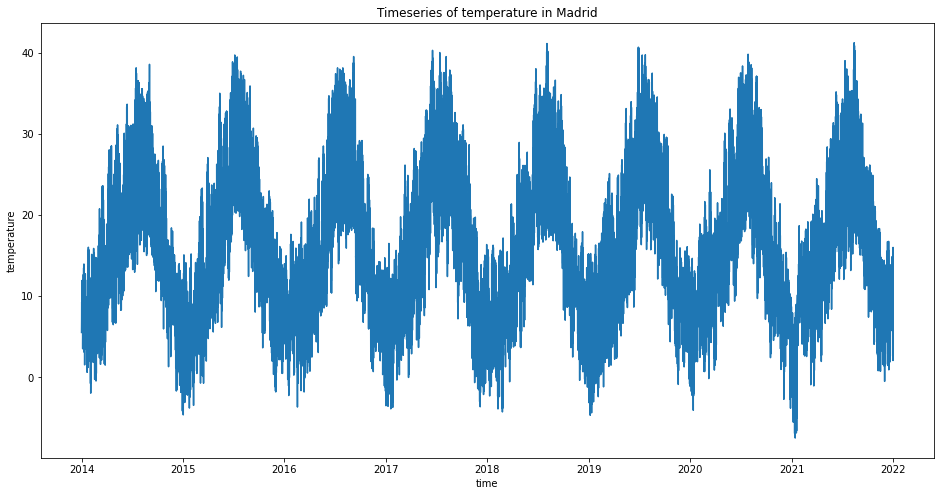

In [48]:
# Visualization:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=weather_df,x="time",y="temperature",ax=ax)
plt.title("Timeseries of temperature in Madrid")